<a href="https://colab.research.google.com/github/davidecopp/Italy-Quality-Life-2021/blob/main/ItalyQualityLife.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import plotly.express as px

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## START

In [ ]:
coordinate = pd.read_excel('/content/coordinateprovince.xlsx')
data_original = pd.read_csv('https://raw.githubusercontent.com/IlSole24ORE/QDV2021/main/20211213_QDV2021_001.csv')
data = data_original.copy()

In [ ]:
coordinate.head()

,città,longitudine,latitudine
0,Agrigento,13.584575,37.309711
1,Alessandria,8.615401,44.912974
2,Ancona,13.518875,43.616760
3,Arezzo,11.882288,43.466428
4,Ascoli Piceno,13.576911,42.853223


In [ ]:
data.head()

,NOME PROVINCIA (ISTAT),CODICE NUTS 3 2021,CODICE PROVINCIA ISTAT (STORICO),DENOMINAZIONE CORRENTE,VALORE,INDICATORE,UNITA' DI MISURA,RIFERIMENTO TEMPORALE,FONTE ORIGINALE
0,Reggio Calabria,ITF65,80,Reggio Calabria,2.034894,Imprese cessate,Ogni 100 imprese registrate,Al 30 settembre 2021,Infocamere
1,Messina,ITG13,83,Messina,2.238417,Imprese cessate,Ogni 100 imprese registrate,Al 30 settembre 2021,Infocamere
2,Palermo,ITG12,82,Palermo,2.260657,Imprese cessate,Ogni 100 imprese registrate,Al 30 settembre 2021,Infocamere
3,Catanzaro,ITF63,79,Catanzaro,2.293169,Imprese cessate,Ogni 100 imprese registrate,Al 30 settembre 2021,Infocamere
4,Ragusa,ITG18,88,Ragusa,2.323061,Imprese cessate,Ogni 100 imprese registrate,Al 30 settembre 2021,Infocamere


In [ ]:
# There is no NaN value: very well!
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9630 entries, 0 to 9629
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   NOME PROVINCIA (ISTAT)            9630 non-null   object 
 1   CODICE NUTS 3 2021                9630 non-null   object 
 2   CODICE PROVINCIA ISTAT (STORICO)  9630 non-null   int64  
 3   DENOMINAZIONE CORRENTE            9630 non-null   object 
 4   VALORE                            9630 non-null   float64
 5   INDICATORE                        9630 non-null   object 
 6   UNITA' DI MISURA                  9630 non-null   object 
 7   RIFERIMENTO TEMPORALE             9630 non-null   object 
 8   FONTE ORIGINALE                   9630 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 677.2+ KB


In [ ]:
print('Number of provinces:',len(data.groupby('NOME PROVINCIA (ISTAT)').count()))
#print('Numero province con un nome istat diverso dalla denominazione corrente:',len(data[data['NOME PROVINCIA (ISTAT)']!=data['DENOMINAZIONE CORRENTE']].groupby('DENOMINAZIONE CORRENTE').count()))
print('Number of indicators:',len(data.groupby('INDICATORE').count()))

Number of provinces: 107
Number of indicators: 90


In [ ]:
data = data.drop(columns=['CODICE PROVINCIA ISTAT (STORICO)','DENOMINAZIONE CORRENTE','CODICE NUTS 3 2021','RIFERIMENTO TEMPORALE','FONTE ORIGINALE'])
data

,NOME PROVINCIA (ISTAT),VALORE,INDICATORE,UNITA' DI MISURA
0,Reggio Calabria,2.034894,Imprese cessate,Ogni 100 imprese registrate
1,Messina,2.238417,Imprese cessate,Ogni 100 imprese registrate
2,Palermo,2.260657,Imprese cessate,Ogni 100 imprese registrate
3,Catanzaro,2.293169,Imprese cessate,Ogni 100 imprese registrate
4,Ragusa,2.323061,Imprese cessate,Ogni 100 imprese registrate
...,...,...,...,...
9625,Cosenza,14.576091,Valore aggiunto per abitante,Migliaia di euro a valori correnti
9626,Barletta-Andria-Trani,14.505429,Valore aggiunto per abitante,Migliaia di euro a valori correnti
9627,Vibo Valentia,14.450914,Valore aggiunto per abitante,Migliaia di euro a valori correnti
9628,Sud Sardegna,14.266123,Valore aggiunto per abitante,Migliaia di euro a valori correnti


In [ ]:
#definition of categories
ricchezza_e_consumi = ['Valore aggiunto per abitante ','Spesa delle famiglie ','Depositi bancari','Prezzo medio di vendita delle case','Canoni medi di locazione','Assorbimento del mercato residenziale','Spazio abitativo','Popolazione con finanziamenti attivi','Debiti - Esposizione media residua','Tasso di ingresso in sofferenza','Pagamenti oltre i 30 giorni','Riqualificazioni energetiche','Beneficiari di reddito di cittadinanza','Retribuzione media annua','Reddito medio da pensione di vecchiaia']
affari_e_lavoro = ['Tasso di occupazione ','Giovani Neet','Nuove imprese iscritte','Imprese cessate','Imprenditorialità giovanile','Imprese che fanno ecommerce','Start up innovative ','Imprese straniere ','Numero di ore Cig autorizzate ','Posti letto nelle strutture ricettive ','Qualità delle strutture ricettive  ','Quota di export sul Pil','Home e corporate banking','Infortuni sul lavoro','Qualità della vita delle donne']
giustizia_e_sicurezza = ['Indice di criminalità','Furti di autovetture','Furti in abitazione','Rapine ','Reati legati agli stupefacenti','Riciclaggio e impiego di denaro','Truffe e frodi informatiche','Delitti informatici','Estorsioni','Mortalità per incidenti stradali','Esposti per inquinamento acustico ','Denunce di scomparsa di under 18','Capacità di riscossione dei Comuni','Indice di litigiosità','Quota cause pendenti ultratriennali']
demografia_e_societa = ['Speranza di vita alla nascita ','Quoziente di natalità','Saldo migratorio totale','Indice di dipendenza anziani ','Acquisizioni di cittadinanza','Persone con almeno il diploma','Anni di studio','Laureati e altri titoli terziari','Amministratori comunali under 40','Casi Covid-19','Medici specialisti','Medici di medicina generale','Farmaci per depressione','Farmaci per malattie croniche','Emigrazione ospedaliera']
ambiente_e_servizi = ['Raccolta differenziata  ','Piste ciclabili','Offerta del trasporto pubblico','Tasso di motorizzazione',"Qualità dell'aria",'Affollamento negli istituti di pena','Farmacie ','Energia elettrica da fonti rinnovabili','Pos attivi','Spesa sociale dei Comuni','ICityRank ','Indice del clima','Qualità della vita dei bambini','Qualità della vita dei giovani','Qualità della vita degli anziani']
cultura_e_tempolibero = ['Librerie ','Bar','Ristoranti ','Palestre, piscine, terme','Patrimonio museale','Aziende agrituristiche','Verde storico','Offerta culturale ','Spesa dei Comuni per la cultura','Banda ultra larga (Fttc)','Banda ultra larga (Ftth)','Indice di lettura ','Formazione continua','Indice di sportività ','Sport e Covid']

In [ ]:
ricchezza_e_consumi_inverse = ['Canoni medi di locazione','Debiti - Esposizione media residua','Tasso di ingresso in sofferenza','Pagamenti oltre i 30 giorni','Beneficiari di reddito di cittadinanza']
affari_e_lavoro_inverse = ['Giovani Neet','Imprese cessate','Numero di ore Cig autorizzate ','Infortuni sul lavoro']
giustizia_e_sicurezza_inverse = ['Indice di criminalità','Furti di autovetture','Furti in abitazione','Rapine ','Reati legati agli stupefacenti','Riciclaggio e impiego di denaro','Truffe e frodi informatiche','Delitti informatici','Estorsioni','Mortalità per incidenti stradali','Esposti per inquinamento acustico ','Denunce di scomparsa di under 18','Indice di litigiosità','Quota cause pendenti ultratriennali']
demografia_e_societa_inverse = ['Indice di dipendenza anziani ','Casi Covid-19','Farmaci per depressione','Farmaci per malattie croniche','Emigrazione ospedaliera']
ambiente_e_servizi_inverse = ['Tasso di motorizzazione',"Qualità dell'aria",'Affollamento negli istituti di pena']
cultura_e_tempolibero_inverse = []

In [ ]:
df_ricchezza_e_consumi = data[data['INDICATORE'].isin(ricchezza_e_consumi)]
df_affari_e_lavoro = data[data['INDICATORE'].isin(affari_e_lavoro)]
df_giustizia_e_sicurezza = data[data['INDICATORE'].isin(giustizia_e_sicurezza)]
df_demografia_e_societa = data[data['INDICATORE'].isin(demografia_e_societa)]
df_ambiente_e_servizi = data[data['INDICATORE'].isin(ambiente_e_servizi)]
df_cultura_e_tempolibero = data[data['INDICATORE'].isin(cultura_e_tempolibero)]

In [ ]:
province = sorted(data['NOME PROVINCIA (ISTAT)'].unique())

lists = {
    'Ricchezza e consumi': ricchezza_e_consumi,
    'Affari e lavoro': affari_e_lavoro,
    'Giustizia e sicurezza': giustizia_e_sicurezza,
    'Demografia e società': demografia_e_societa,
    'Ambiente e servizi': ambiente_e_servizi,
    'Cultura e tempo libero': cultura_e_tempolibero
}

inverse_lists = {
    'Ricchezza e consumi': ricchezza_e_consumi_inverse,
    'Affari e lavoro': affari_e_lavoro_inverse,
    'Giustizia e sicurezza': giustizia_e_sicurezza_inverse,
    'Demografia e società': demografia_e_societa_inverse,
    'Ambiente e servizi': ambiente_e_servizi_inverse,
    'Cultura e tempo libero': cultura_e_tempolibero_inverse
}

dataframes = {
    'Ricchezza e consumi': df_ricchezza_e_consumi,
    'Affari e lavoro': df_affari_e_lavoro,
    'Giustizia e sicurezza': df_giustizia_e_sicurezza,
    'Demografia e società': df_demografia_e_societa,
    'Ambiente e servizi': df_ambiente_e_servizi,
    'Cultura e tempo libero': df_cultura_e_tempolibero
}

In [ ]:
#Function that takes as input the topic of the table and the index useful to compose the ranking

def classifica(argomento, index):
  a = dataframes[argomento].groupby(['NOME PROVINCIA (ISTAT)','INDICATORE']).sum().reset_index()
  values = np.array(a['VALORE']).reshape((107,15))
  df = pd.DataFrame(values,columns = sorted(lists[argomento]), index = province)

  for ind in lists[argomento]:
    if ind in inverse_lists[argomento]:
      df[ind] = (df[ind]-df[ind].max())/(df[ind].min()-df[ind].max())*1000
    else:
      df[ind] = (df[ind]-df[ind].min())/(df[ind].max()-df[ind].min())*1000

  if index == 'mean':
    df['MEAN'] = df.mean(1)

  elif index == 'dp2':
    #R2
    R_list=[0]
    for i in range(1,len(lists[argomento])):
      y = df[lists[argomento][i:i+1]]
      X = df[lists[argomento][:i]]
      reg = LinearRegression().fit(X,y)
      R_list.append(reg.score(X,y))

    x_star = df.min()
    d = df-x_star
    delta = df.std()

    #CALCOLO DP2
    dp2_list = []
    for i in range(len(d)):
      dp2 = 0
      j = 0
      for column in d.columns:
        dp2 += d[column][i]/delta[j]*(1-R_list[j])
        j += 1
      dp2_list.append(dp2)
        
    df['DP2'] = dp2_list
  
  elif index == 'mpi':
    for column in df.columns:
      df[column] = 100+((df[column]-df[column].mean())/df[column].std())*10
    df['MPI'] = df.mean(1)-df.std(1)*df.std(1)/df.mean(1)

  return df

In [ ]:
classifica('Ricchezza e consumi','dp2')

,Assorbimento del mercato residenziale,Beneficiari di reddito di cittadinanza,Canoni medi di locazione,Debiti - Esposizione media residua,Depositi bancari,Pagamenti oltre i 30 giorni,Popolazione con finanziamenti attivi,Prezzo medio di vendita delle case,Reddito medio da pensione di vecchiaia,Retribuzione media annua,Riqualificazioni energetiche,Spazio abitativo,Spesa delle famiglie,Tasso di ingresso in sofferenza,Valore aggiunto per abitante,DP2
Agrigento,815.040650,315.367649,947.019868,972.151211,164.016662,244.273771,304.105175,47.058824,171.078334,121.036454,1.914486,553.122485,94.159714,333.333333,0.000000,10.754986
Alessandria,485.772358,719.418509,874.172185,661.619058,633.506315,593.410365,705.211877,152.941176,323.444751,594.384546,475.430759,671.638669,753.277712,500.000000,335.621562,14.812262
Ancona,73.170732,839.179846,814.569536,569.574962,659.826070,815.661964,704.355955,235.294118,376.271034,488.244069,391.831525,302.862360,671.036949,583.333333,393.085328,13.097500
Arezzo,282.520325,842.742581,721.854305,585.587216,533.086637,679.477718,658.248543,317.647059,259.787919,457.995573,266.751755,423.789488,773.539928,750.000000,332.748727,13.573819
Ascoli Piceno,288.617886,822.202162,980.132450,671.549126,548.964191,591.694680,598.727965,47.058824,203.378848,321.861413,261.646458,365.600849,594.755662,500.000000,243.510567,11.900790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vercelli,182.926829,737.070541,933.774834,697.931770,612.366236,810.512470,790.178334,117.647059,281.848485,597.437000,791.320996,610.542990,784.862932,666.666667,315.144400,14.676987
Verona,906.504065,887.286138,470.198675,371.567289,635.335578,850.352030,656.844606,552.941176,318.379728,575.124885,486.279515,312.921367,891.537545,750.000000,464.564052,17.531936
Vibo Valentia,63.008130,394.399549,980.132450,941.902396,292.116226,370.634735,360.671251,11.764706,77.036139,0.000000,89.342693,499.763510,193.087008,333.333333,6.993235,7.588622
Vicenza,380.081301,919.184343,748.344371,455.506861,636.875705,849.468746,651.917877,317.647059,305.125613,655.417708,463.943842,420.236780,882.598331,583.333333,475.654308,15.229665


## COMPUTING the SYNTHETIC INDICATORS

### RICCHEZZA E CONSUMI

In [ ]:
classifica('Ricchezza e consumi','mpi')

,Assorbimento del mercato residenziale,Beneficiari di reddito di cittadinanza,Canoni medi di locazione,Debiti - Esposizione media residua,Depositi bancari,Pagamenti oltre i 30 giorni,Popolazione con finanziamenti attivi,Prezzo medio di vendita delle case,Reddito medio da pensione di vecchiaia,Retribuzione media annua,Riqualificazioni energetiche,Spazio abitativo,Spesa delle famiglie,Tasso di ingresso in sofferenza,Valore aggiunto per abitante,MPI
Agrigento,118.128240,84.202504,108.631589,117.800445,84.907753,85.615340,82.221798,90.345756,90.891518,86.103899,86.337094,107.369326,83.367672,89.352979,84.779365,91.587371
Alessandria,103.404460,101.553500,105.108919,103.051611,105.943251,99.521987,104.031546,95.493617,100.050058,108.691185,106.794092,113.295353,107.454201,98.358760,102.966545,103.521715
Ancona,84.954291,106.696364,102.226734,98.679944,107.122509,108.374610,103.985006,99.497509,103.225374,103.626360,103.182412,94.855859,104.448829,102.861650,106.080481,101.651173
Arezzo,94.315707,106.849357,97.743336,99.440451,101.443945,102.950182,101.477965,103.501401,96.223732,102.182958,97.778676,100.902438,108.194655,111.867430,102.810868,101.635533
Ascoli Piceno,94.588369,105.967298,110.232803,103.523243,102.155339,99.453649,98.241597,90.345756,92.833059,95.686890,97.558116,97.992899,101.661238,98.358760,97.975092,98.844932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vercelli,89.862218,102.311525,107.991104,104.776296,104.996070,108.169498,108.651506,93.777663,97.549762,108.836842,120.441281,110.240457,108.608438,107.364540,101.856897,104.512552
Verona,122.218179,108.762174,85.574113,89.275499,106.025212,109.756369,101.401627,114.941092,99.745606,107.772150,107.262783,95.358828,112.506710,111.867430,109.953880,104.595315
Vibo Valentia,84.499853,87.596340,110.232803,116.363767,90.647258,90.648491,85.297518,88.629802,85.238769,80.328265,90.114194,104.701279,86.982829,89.352979,85.158325,90.562056
Vicenza,98.678308,110.131966,99.024307,93.262239,106.094217,109.721186,101.133742,103.501401,98.948919,111.603573,106.297830,100.724796,112.180039,102.861650,110.554856,103.999220


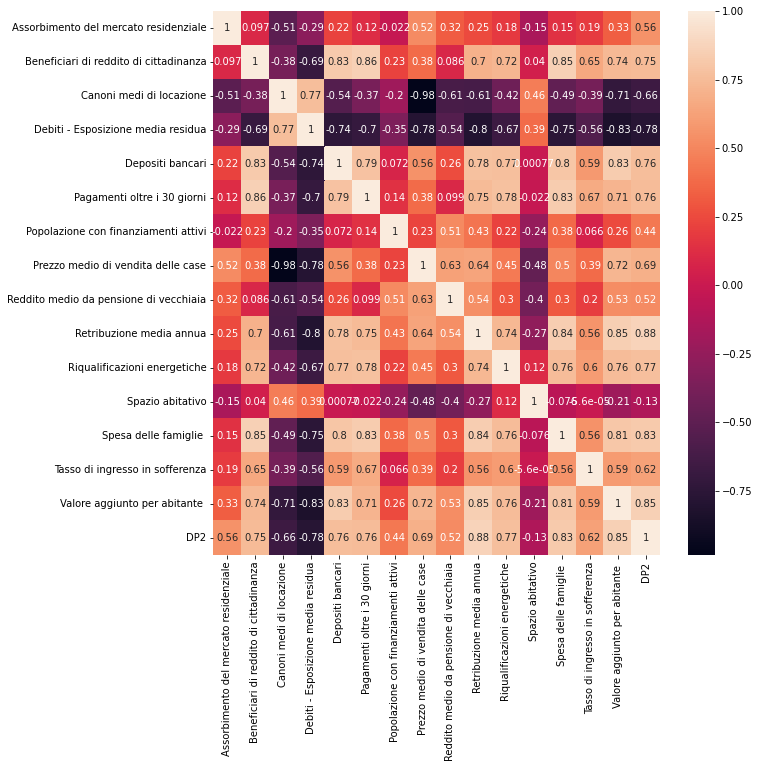

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sb.heatmap(classifica('Ricchezza e consumi','dp2').corr(),annot=True)

In [ ]:
result_ricchezza_e_consumi = pd.DataFrame()
result_ricchezza_e_consumi['MEAN'] = classifica('Ricchezza e consumi','mean')['MEAN']
result_ricchezza_e_consumi['DP2'] = classifica('Ricchezza e consumi','dp2')['DP2']
result_ricchezza_e_consumi['MPI'] = classifica('Ricchezza e consumi','mpi')['MPI']

In [ ]:
result_ricchezza_e_consumi.sort_values(by = 'MPI', ascending = False)

### AFFARI e LAVORO

In [ ]:
classifica('Affari e lavoro','mean')

,Giovani Neet,Home e corporate banking,Imprenditorialità giovanile,Imprese cessate,Imprese che fanno ecommerce,Imprese straniere,Infortuni sul lavoro,Numero di ore Cig autorizzate,Nuove imprese iscritte,Posti letto nelle strutture ricettive,Qualità della vita delle donne,Qualità delle strutture ricettive,Quota di export sul Pil,Start up innovative,Tasso di occupazione,MEAN
Agrigento,413.978495,230.433811,792.580208,738.651477,44.786266,173.696371,562.500000,993.580907,273.587804,25.956660,239.022463,852.633739,16.525109,0.000000,194.711538,370.176323
Alessandria,537.634409,551.774512,143.249018,370.139869,345.645128,271.699953,597.222222,797.935505,293.291558,11.737397,542.938086,287.539585,342.508832,218.711349,757.211538,404.615931
Ancona,747.311828,597.354064,128.237524,354.852780,443.585920,244.036873,506.944444,684.858702,249.376748,141.364132,818.638488,238.554338,200.345895,559.989891,798.076923,447.568570
Arezzo,860.215054,444.143478,193.681321,606.598743,537.076740,322.565510,34.722222,744.578662,229.679253,40.282899,885.696018,414.538765,1000.000000,201.706048,867.788462,492.218212
Ascoli Piceno,731.182796,526.417705,113.417689,387.431920,481.179798,179.380327,218.750000,542.891021,194.864645,120.675116,562.575181,173.030713,431.057326,787.381977,682.692308,408.861902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vercelli,701.612903,508.099018,317.277143,544.966581,304.144457,269.701153,708.333333,501.475791,197.360185,9.927095,662.149426,70.160121,413.612114,17.939007,762.019231,399.251837
Verona,948.924731,836.602172,216.080566,486.635084,547.733631,338.254142,489.583333,892.318759,373.242334,291.014173,725.892901,357.877295,299.000313,492.624418,906.250000,546.802257
Vibo Valentia,309.139785,14.987997,1000.000000,732.580269,106.647977,72.016650,475.694444,978.951131,502.714829,173.343898,225.584945,488.005123,4.787512,55.204581,105.769231,349.695225
Vicenza,860.215054,741.053647,108.173606,464.288995,744.883792,212.009344,590.277778,696.662572,247.652542,57.606862,710.013001,213.126852,487.142325,310.315630,812.500000,483.728133


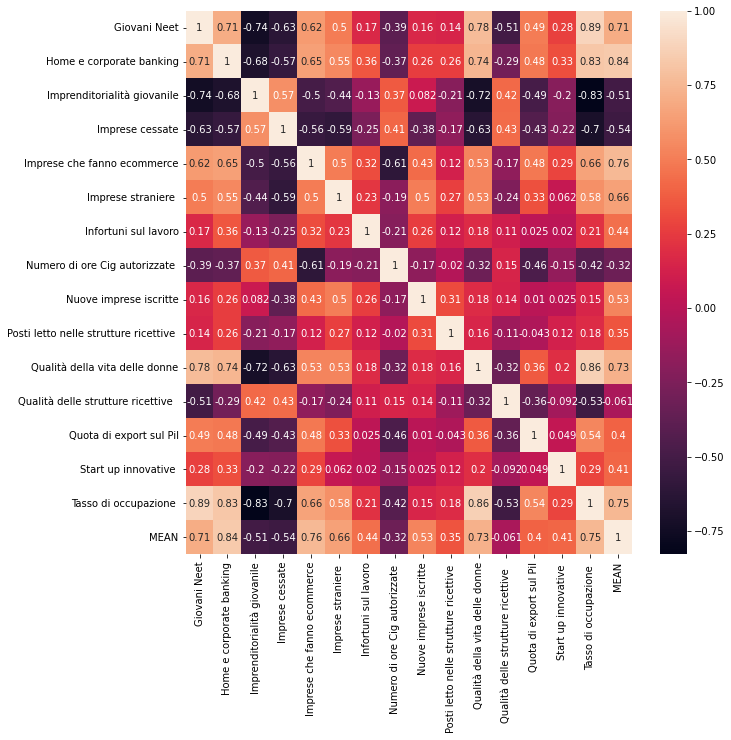

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sb.heatmap(classifica('Affari e lavoro','mean').corr(),annot=True)

In [ ]:
result_affari_e_lavoro = pd.DataFrame()
result_affari_e_lavoro['MEAN'] = classifica('Affari e lavoro','mean')['MEAN']
result_affari_e_lavoro['DP2'] = classifica('Affari e lavoro','dp2')['DP2']
result_affari_e_lavoro['MPI'] = classifica('Affari e lavoro','mpi')['MPI']

In [ ]:
result_affari_e_lavoro.sort_values(by = 'MEAN', ascending = False)

### GIUSTIZIA e SICUREZZA

In [ ]:
classifica('Giustizia e sicurezza', 'mean')

,Capacità di riscossione dei Comuni,Delitti informatici,Denunce di scomparsa di under 18,Esposti per inquinamento acustico,Estorsioni,Furti di autovetture,Furti in abitazione,Indice di criminalità,Indice di litigiosità,Mortalità per incidenti stradali,Quota cause pendenti ultratriennali,Rapine,Reati legati agli stupefacenti,Riciclaggio e impiego di denaro,Truffe e frodi informatiche,MEAN
Agrigento,679.824561,940.225291,368.998346,989.308776,678.615071,942.793943,848.390271,763.698630,711.810394,812.5,776.691755,900.903844,679.278852,945.402299,606.025125,776.297811
Alessandria,767.543860,848.292151,819.047934,880.267625,773.930754,938.549797,472.936876,668.711083,810.056689,375.0,801.672754,824.676032,803.107579,840.517241,526.166425,743.365120
Ancona,780.701754,840.297965,896.275614,943.850704,674.949084,963.385246,744.130465,837.640100,638.246644,812.5,841.069613,919.525210,653.777725,645.114943,595.665721,785.808719
Arezzo,662.280702,704.578488,909.634674,930.800325,606.924644,982.106248,739.884718,756.039851,791.896342,812.5,728.174334,900.794947,559.364251,780.890805,620.155193,765.735035
Ascoli Piceno,618.421053,946.311773,804.569078,974.065059,689.205703,924.414632,810.628427,765.846824,796.556645,875.0,751.619274,916.367200,870.715218,733.477011,669.352438,809.770022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vercelli,798.245614,751.362645,882.017859,946.613746,712.830957,984.641945,871.362294,782.129514,829.802266,625.0,940.182163,954.698900,814.612739,928.160920,470.539205,819.480051
Verona,807.017544,743.459302,890.979393,880.456872,802.036660,945.923102,535.470266,671.264010,793.716167,687.5,860.779954,754.546445,823.627090,950.431034,495.088214,776.153070
Vibo Valentia,548.245614,881.904070,284.910889,921.736395,237.881874,931.284394,875.017573,611.114570,690.630717,1000.0,-0.000000,802.678863,709.998814,920.977011,546.448630,664.188628
Vicenza,780.701754,834.302326,927.642907,915.494405,779.633401,959.716577,499.001828,748.661270,913.059924,812.5,693.095106,854.731569,970.228917,854.166667,314.294787,790.482096


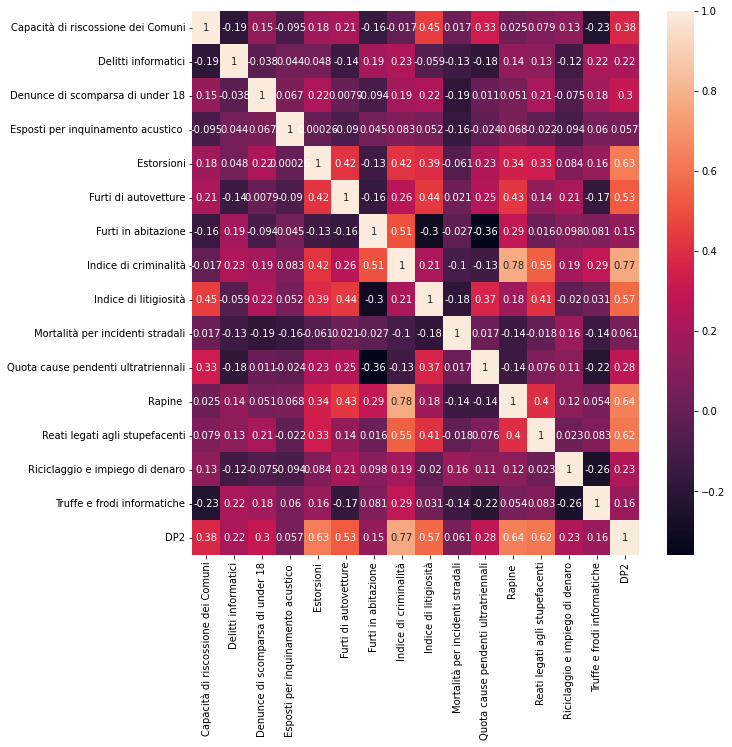

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sb.heatmap(classifica('Giustizia e sicurezza','dp2').corr(),annot=True)

In [ ]:
result_giustizia_e_sicurezza = pd.DataFrame()
result_giustizia_e_sicurezza['MEAN'] = classifica('Giustizia e sicurezza','mean')['MEAN']
result_giustizia_e_sicurezza['DP2'] = classifica('Giustizia e sicurezza','dp2')['DP2']
result_giustizia_e_sicurezza['MPI'] = classifica('Giustizia e sicurezza','mpi')['MPI']

In [ ]:
result_giustizia_e_sicurezza.sort_values(by = 'MEAN', ascending = False)

,MEAN,DP2,MPI
Pordenone,861.957433,51.367034,107.541410
Treviso,838.623467,50.192577,106.033875
Oristano,837.628923,49.788973,106.588001
Valle d'Aosta/Vallée d'Aoste,827.860723,48.938009,105.261291
Vercelli,819.480051,48.512967,105.612781
...,...,...,...
Imperia,577.878790,34.320691,91.626886
Milano,577.436787,33.948119,91.028060
Roma,569.931244,32.968911,91.535890
Napoli,560.707948,32.011160,89.013882


### DEMOGRAFIA e SOCIETà

In [ ]:
classifica('Demografia e società', 'mean')

,Acquisizioni di cittadinanza,Amministratori comunali under 40,Anni di studio,Casi Covid-19,Emigrazione ospedaliera,Farmaci per depressione,Farmaci per malattie croniche,Indice di dipendenza anziani,Laureati e altri titoli terziari,Medici di medicina generale,Medici specialisti,Persone con almeno il diploma,Quoziente di natalità,Saldo migratorio totale,Speranza di vita alla nascita,MEAN
Agrigento,83.308015,995.099240,305.491803,869.923733,771.523179,822.393891,145.663847,620.241862,312.500000,629.529321,60.606061,462.462462,520.0,360.000000,390.243902,489.932488
Alessandria,159.659996,254.534092,410.932633,847.706671,645.695364,519.665453,202.936697,159.299617,274.305556,300.695108,212.121212,519.519520,160.0,613.333333,146.341463,361.783114
Ancona,830.699519,416.112109,676.662873,616.528163,771.523179,537.505583,187.411225,375.973384,753.472222,544.860932,545.454545,780.780781,320.0,680.000000,878.048780,594.335553
Arezzo,545.077342,620.351312,390.348437,709.976789,831.125828,432.952782,345.135231,352.068243,548.611111,427.771730,169.191919,561.561562,360.0,573.333333,878.048780,516.370293
Ascoli Piceno,503.539649,687.389096,695.018841,777.674974,662.251656,766.440158,217.212285,354.017278,1000.000000,519.982919,202.020202,798.798799,300.0,520.000000,902.439024,593.785659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vercelli,362.001706,480.732156,399.330403,768.860213,771.523179,611.270930,313.510277,201.706992,437.500000,382.825872,159.090909,612.612613,260.0,573.333333,121.951220,430.416654
Verona,434.660839,451.897755,644.097735,654.622925,877.483444,734.490391,457.207926,647.038827,513.888889,264.865720,308.080808,834.834835,560.0,720.000000,731.707317,588.991827
Vibo Valentia,58.585188,886.479971,330.000583,842.593866,490.066225,770.618882,119.923935,617.934748,315.972222,631.371288,20.202020,366.366366,600.0,173.333333,634.146341,457.172998
Vicenza,776.267828,546.009728,467.830174,710.656597,913.907285,702.898203,578.054423,647.609939,600.694444,333.178053,30.303030,603.603604,500.0,486.666667,756.097561,576.918502


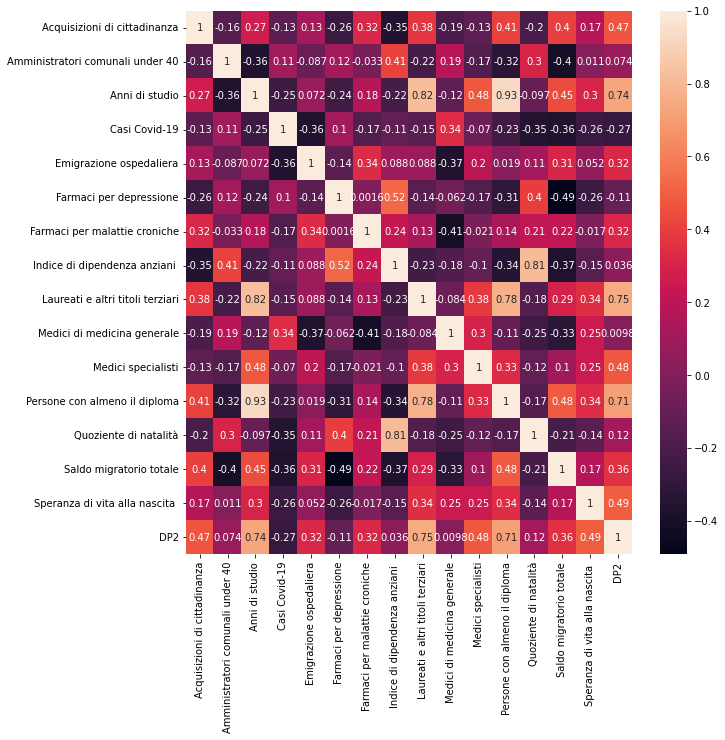

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sb.heatmap(classifica('Demografia e società','dp2').corr(),annot=True)

In [ ]:
result_demografia_e_societa = pd.DataFrame()
result_demografia_e_societa['MEAN'] = classifica('Demografia e società','mean')['MEAN']
result_demografia_e_societa['DP2'] = classifica('Demografia e società','dp2')['DP2']
result_demografia_e_societa['MPI'] = classifica('Demografia e società','mpi')['MPI']

In [ ]:
result_demografia_e_societa.sort_values(by = 'MEAN', ascending = False)

,MEAN,DP2,MPI
Bologna,665.882633,31.649611,106.133064
Trento,640.722468,29.548633,105.728603
Roma,637.739198,28.541871,105.238115
Milano,636.062405,28.119091,105.290932
Pescara,623.881483,28.307345,105.307703
...,...,...,...
Crotone,393.406169,17.616241,92.437541
Imperia,391.354071,17.970292,93.521819
Caltanissetta,380.970461,17.205726,92.558953
Taranto,376.453007,17.342687,92.587294


### AMBIENTE e SERVIZI

In [ ]:
classifica('Ambiente e servizi','mean')

,Affollamento negli istituti di pena,Energia elettrica da fonti rinnovabili,Farmacie,ICityRank,Indice del clima,Offerta del trasporto pubblico,Piste ciclabili,Pos attivi,Qualità dell'aria,Qualità della vita degli anziani,Qualità della vita dei bambini,Qualità della vita dei giovani,Raccolta differenziata,Spesa sociale dei Comuni,Tasso di motorizzazione,MEAN
Agrigento,505.284348,311.286650,263.939731,126.878389,665.962702,122.281277,30.386259,89.840606,1000.000000,0.000000,308.990596,390.305519,803.278339,230.958421,116.527023,331.061324
Alessandria,477.101158,377.329859,554.936022,510.921766,21.790934,154.673900,0.000000,236.391812,273.920857,348.465173,332.731891,516.676983,466.693435,83.140145,415.055147,317.988605
Ancona,411.675893,367.523523,138.904356,465.685515,696.515650,349.147590,20.511632,300.545148,495.973511,632.775590,694.083714,424.745630,549.177585,128.352605,472.369077,409.865801
Arezzo,863.110216,268.805635,262.786103,557.242448,315.044460,147.712456,119.930011,208.231855,625.397552,507.354627,633.895309,251.862004,517.342418,230.362729,294.408285,386.899074
Ascoli Piceno,385.505788,338.697030,327.564860,334.779241,374.083063,225.278001,43.370365,319.032353,738.338838,282.770234,429.583258,354.325321,696.946457,199.680387,224.057482,351.600845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vercelli,434.826371,281.634369,630.153672,492.021689,0.088226,40.323877,430.461541,248.294653,409.405133,259.457474,547.668660,867.428578,807.773110,52.306566,355.846898,390.512721
Verona,290.890790,196.546283,128.260693,733.075136,249.734180,201.342183,262.208163,307.024680,278.629970,489.635948,618.349682,574.371606,521.152454,263.240201,417.027212,368.765945
Vibo Valentia,647.710116,140.257537,695.968299,347.172734,341.295997,16.044655,0.000000,156.994720,783.530906,64.795904,149.426706,319.255699,474.019280,0.000000,52.932129,279.293645
Vicenza,327.126321,165.058314,151.453728,683.965918,231.734515,192.344665,509.109144,245.600635,285.266946,457.595550,543.195179,403.109323,827.190557,83.562507,418.458561,368.318124


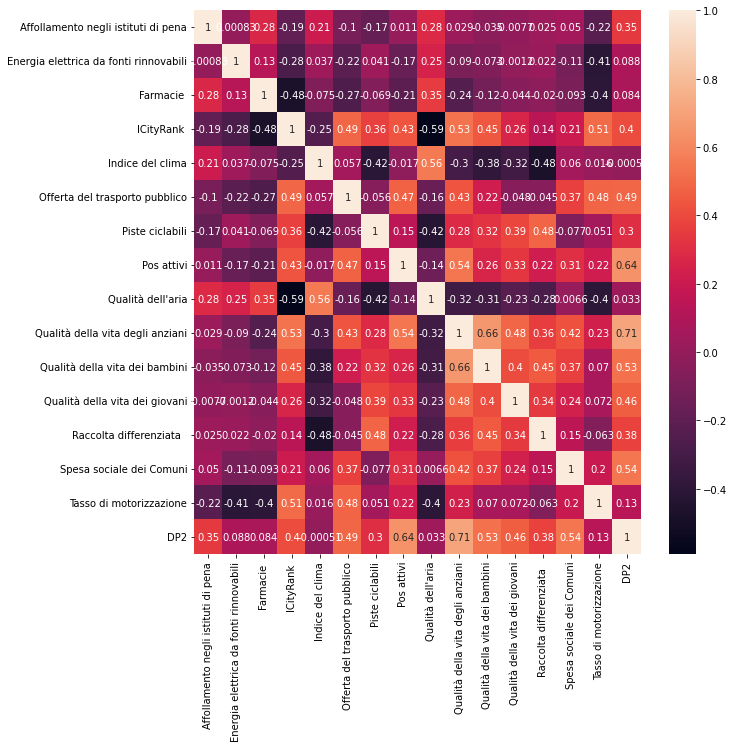

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sb.heatmap(classifica('Ambiente e servizi','dp2').corr(),annot=True)

In [ ]:
result_ambiente_e_servizi = pd.DataFrame()
result_ambiente_e_servizi['MEAN'] = classifica('Ambiente e servizi','mean')['MEAN']
result_ambiente_e_servizi['DP2'] = classifica('Ambiente e servizi','dp2')['DP2']
result_ambiente_e_servizi['MPI'] = classifica('Ambiente e servizi','mpi')['MPI']

In [ ]:
result_ambiente_e_servizi.sort_values(by = 'MEAN', ascending = False)

,MEAN,DP2,MPI
Trento,522.810445,27.637626,106.591492
Trieste,509.719834,27.278218,105.367607
Oristano,509.344732,27.722779,105.930442
Ravenna,492.877010,24.572812,103.888372
Bolzano/Bozen,488.962788,25.880878,104.371574
...,...,...,...
Napoli,269.714910,13.828441,93.740760
Foggia,265.363533,14.799884,93.656029
Avellino,263.786695,14.358276,93.503595
Caserta,261.021733,13.370932,93.534705


### CULTURA e TEMPO LIBERO

In [ ]:
classifica('Cultura e tempo libero','mean')

,Aziende agrituristiche,Banda ultra larga (Fttc),Banda ultra larga (Ftth),Bar,Formazione continua,Indice di lettura,Indice di sportività,Librerie,Offerta culturale,"Palestre, piscine, terme",Patrimonio museale,Ristoranti,Spesa dei Comuni per la cultura,Sport e Covid,Verde storico,MEAN
Agrigento,7.299270,811.201262,187.812301,144.768823,187.050360,15.455251,15.213836,291.741528,200.682761,84.668838,38.119805,121.513830,56.558192,892.744292,0.000000,203.655357
Alessandria,131.386861,521.477903,176.659466,302.208813,194.244604,571.486815,338.977614,355.225549,483.282253,410.125797,7.451992,245.617349,51.985378,662.741678,77.441077,302.020877
Ancona,216.545012,648.866115,371.403819,90.907182,388.489209,425.868008,494.205472,503.271882,545.251101,386.826482,21.496131,296.026208,140.274406,328.318835,77.441077,329.012729
Arezzo,486.618005,466.109520,157.036489,204.244866,316.546763,311.168886,223.132927,320.267150,523.726568,479.893987,16.910289,293.436146,113.920852,714.188771,26.936027,310.275816
Ascoli Piceno,272.506083,459.631545,253.114902,379.668868,258.992806,380.593625,419.409685,448.072826,830.273484,656.126418,7.738607,573.558260,109.457613,648.787604,30.303030,381.882357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vercelli,4.866180,458.590414,453.777391,455.036344,237.410072,477.068865,270.758369,476.499065,480.014284,405.721359,3.152766,214.468456,88.495130,720.459132,6.734007,316.870122
Verona,309.002433,637.728081,552.850981,277.213265,546.762590,626.449708,728.537774,108.470744,393.301757,495.300361,73.660075,249.634227,74.962337,277.490869,151.515152,366.858690
Vibo Valentia,63.260341,341.438246,0.000000,255.059128,323.741007,125.870966,136.712046,306.964110,45.470592,156.240122,13.184293,242.406804,16.575122,619.377028,23.569024,177.991255
Vicenza,175.182482,426.860913,209.368025,194.864250,345.323741,515.139827,586.841929,148.271986,444.615356,372.704690,31.527658,105.632612,111.245676,159.662867,57.239057,258.965405


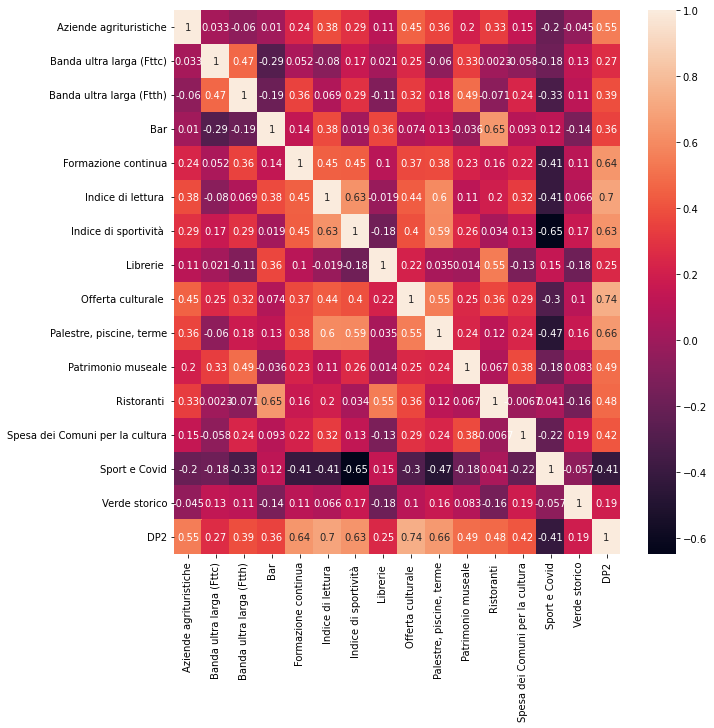

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sb.heatmap(classifica('Cultura e tempo libero','dp2').corr(),annot=True)

In [ ]:
result_cultura_e_tempolibero = pd.DataFrame()
result_cultura_e_tempolibero['MEAN'] = classifica('Cultura e tempo libero','mean')['MEAN']
result_cultura_e_tempolibero['DP2'] = classifica('Cultura e tempo libero','dp2')['DP2']
result_cultura_e_tempolibero['MPI'] = classifica('Cultura e tempo libero','mpi')['MPI']

In [ ]:
result_cultura_e_tempolibero.sort_values(by = 'MEAN', ascending = False)

,MEAN,DP2,MPI
Trieste,668.357627,38.052569,115.709452
Savona,487.598163,26.093741,107.278656
Roma,463.761247,23.577187,106.566325
Gorizia,458.784134,24.868001,106.093333
Firenze,457.211648,25.071745,107.209025
...,...,...,...
Trapani,199.507128,9.465744,93.454526
Frosinone,197.791850,10.297165,93.919636
Reggio Calabria,195.442074,9.114369,93.623948
Vibo Valentia,177.991255,9.321782,92.979075


## FINAL RANKINGS

### CLASSIFICA TRAMITE IL VALORE MEDIO DEI VALORI MEDI

In [ ]:
classifica_finale_mean = pd.DataFrame(index = province, columns = ['MEAN'])
classifica_finale_mean['Ricchezza e consumi'] = result_ricchezza_e_consumi['MEAN']
classifica_finale_mean['Affari e lavoro'] = result_affari_e_lavoro['MEAN']
classifica_finale_mean['Giustizia e sicurezza'] = result_giustizia_e_sicurezza['MEAN']
classifica_finale_mean['Demografia e società'] = result_demografia_e_societa['MEAN']
classifica_finale_mean['Ambiente e servizi'] = result_ambiente_e_servizi['MEAN']
classifica_finale_mean['Cultura e tempo libero'] = result_cultura_e_tempolibero['MEAN']
classifica_finale_mean['MEAN'] = classifica_finale_mean.mean(1)

In [ ]:
classifica_finale_mean.sort_values(by = 'MEAN', ascending = False).reset_index()

,index,MEAN,Ricchezza e consumi,Affari e lavoro,Giustizia e sicurezza,Demografia e società,Ambiente e servizi,Cultura e tempo libero
0,Trieste,588.294788,567.046172,630.100668,612.192255,542.352171,509.719834,668.357627
1,Milano,579.984440,669.464930,673.245791,577.436787,636.062405,470.339868,453.356858
2,Trento,572.735268,615.381371,562.767850,744.424137,640.722468,522.810445,350.305339
3,Valle d'Aosta/Vallée d'Aoste,565.757302,650.680593,513.446228,827.860723,514.664624,468.580583,419.311062
4,Bolzano/Bozen,559.280534,614.157193,535.434277,764.589420,591.143044,488.962788,361.396483
...,...,...,...,...,...,...,...,...
102,Caltanissetta,374.765320,339.103586,320.946547,723.223119,380.970461,273.351362,210.996844
103,Vibo Valentia,372.659018,307.612358,349.695225,664.188628,457.172998,279.293645,177.991255
104,Trapani,369.904497,295.096257,363.940505,615.017356,430.546586,315.319153,199.507128
105,Foggia,361.708189,336.077757,346.756949,545.011795,445.983036,265.363533,231.056065


In [ ]:
df = pd.concat([classifica_finale_mean,coordinate.set_index('città')],axis = 1)
fig = px.scatter_mapbox(df,lat='latitudine',lon='longitudine',color='MEAN',hover_name=df.index,center=dict(lat=41.89277, lon=12.483667),zoom=4,mapbox_style='carto-positron')
fig.show()

### CLASSIFICA TRAMITE IL DP2 DEI DP2

In [ ]:
classifica_finale_dp2 = pd.DataFrame(index = province)
classifica_finale_dp2['Ricchezza e consumi'] = result_ricchezza_e_consumi['DP2']
classifica_finale_dp2['Affari e lavoro'] = result_affari_e_lavoro['DP2']
classifica_finale_dp2['Giustizia e sicurezza'] = result_giustizia_e_sicurezza['DP2']
classifica_finale_dp2['Demografia e società'] = result_demografia_e_societa['DP2']
classifica_finale_dp2['Ambiente e servizi'] = result_ambiente_e_servizi['DP2']
classifica_finale_dp2['Cultura e tempo libero'] = result_cultura_e_tempolibero['DP2']

In [ ]:
#R2
R_list=[0]
for i in range(1,len(classifica_finale_dp2.columns)):
  y = classifica_finale_dp2[classifica_finale_dp2.columns[i:i+1]]
  X = classifica_finale_dp2[classifica_finale_dp2.columns[:i]]
  reg = LinearRegression().fit(X,y)
  R_list.append(reg.score(X,y))

x_star = classifica_finale_dp2.min()
d = classifica_finale_dp2-x_star
delta = classifica_finale_dp2.std()
dp2_list = []
for i in range(len(d)):
  dp2 = 0
  j = 0
  for column in d.columns:
    dp2 += d[column][i]/delta[j]*(1-R_list[j])
    j += 1
  dp2_list.append(dp2)
classifica_finale_dp2['DP2'] = dp2_list

In [ ]:
classifica_finale_dp2.sort_values(by = 'DP2', ascending = False).reset_index()

,index,Ricchezza e consumi,Affari e lavoro,Giustizia e sicurezza,Demografia e società,Ambiente e servizi,Cultura e tempo libero,DP2
0,Milano,19.842882,27.742154,33.948119,28.119091,26.427514,23.259668,15.486539
1,Trieste,14.506219,27.346210,37.119903,25.121814,27.278218,38.052569,14.928253
2,Trento,15.163145,24.264010,43.356417,29.548633,27.637626,19.273802,14.817468
3,Valle d'Aosta/Vallée d'Aoste,17.318210,21.550617,48.938009,23.651710,24.104961,20.691633,14.040169
4,Bologna,18.160879,23.207604,34.867372,31.649611,23.255205,22.597178,13.947227
...,...,...,...,...,...,...,...,...
102,Taranto,9.300868,16.307855,41.641237,17.342687,13.980458,12.770546,4.081167
103,Caltanissetta,9.930387,14.706861,42.797095,17.205726,14.350989,9.684962,3.884083
104,Trapani,8.546726,16.485629,36.860970,19.364581,16.567015,9.465744,3.651732
105,Foggia,9.171873,16.578497,32.636847,19.613661,14.799884,11.321846,2.981655


In [ ]:
df = pd.concat([classifica_finale_dp2,coordinate.set_index('città')],axis = 1)#.sort_values(by = 'DP2', ascending = False).reset_index()
fig = px.scatter_mapbox(df,lat='latitudine',lon='longitudine',color=df['DP2'],hover_name=df.index,center=dict(lat=41.89277, lon=12.483667),zoom=4,mapbox_style='carto-positron')
fig.show()

### CLASSIFICA TRAMITE IL MPI DEI MPI

In [ ]:
classifica_finale_mpi = pd.DataFrame(index = province,columns = ['MPI'])
classifica_finale_mpi['Ricchezza e consumi'] = result_ricchezza_e_consumi['MPI']
classifica_finale_mpi['Affari e lavoro'] = result_affari_e_lavoro['MPI']
classifica_finale_mpi['Giustizia e sicurezza'] = result_giustizia_e_sicurezza['MPI']
classifica_finale_mpi['Demografia e società'] = result_demografia_e_societa['MPI']
classifica_finale_mpi['Ambiente e servizi'] = result_ambiente_e_servizi['MPI']
classifica_finale_mpi['Cultura e tempo libero'] = result_cultura_e_tempolibero['MPI']
classifica_finale_mpi['MPI'] = classifica_finale_mpi.mean(1)-classifica_finale_mpi.std(1)*classifica_finale_mpi.std(1)/classifica_finale_mpi.mean(1)

In [ ]:
classifica_finale_mpi.sort_values(by = 'MPI', ascending = False).reset_index()

,index,MPI,Ricchezza e consumi,Affari e lavoro,Giustizia e sicurezza,Demografia e società,Ambiente e servizi,Cultura e tempo libero
0,Valle d'Aosta/Vallée d'Aoste,103.635795,106.774989,101.983774,105.261291,99.931835,104.148386,104.054314
1,Trento,103.514269,103.902274,104.448824,100.209240,105.728603,106.591492,100.607660
2,Trieste,103.254133,103.527742,108.514896,92.575344,97.646207,105.367607,115.709452
3,Milano,102.838494,104.448995,109.892209,91.028060,105.290932,102.850298,105.919374
4,Verona,102.714713,104.595315,104.327952,103.168135,103.442529,99.089886,101.905718
...,...,...,...,...,...,...,...,...
102,Caltanissetta,94.039763,92.507112,91.960364,100.290061,92.558953,94.142081,93.395599
103,Trapani,94.016761,90.123373,94.834672,93.975698,95.910028,96.109632,93.454526
104,Vibo Valentia,93.808573,90.562056,93.419360,96.159945,96.552210,93.492271,92.979075
105,Foggia,93.548400,92.840477,94.171117,89.263510,96.511092,93.656029,95.244107


In [ ]:
df = pd.concat([classifica_finale_mpi,coordinate.set_index('città')],axis = 1)
fig = px.scatter_mapbox(df,lat='latitudine',lon='longitudine',color='MPI',hover_name=df.index,center=dict(lat=41.89277, lon=12.483667),zoom=4,mapbox_style='carto-positron')
fig.show()

### CLASSIFICHE A CONFRONTO

In [ ]:
#COMPARISON of the TABLES
cla = pd.DataFrame()
cla['MEAN'] = classifica_finale_mean.sort_values(by = 'MEAN', ascending = False).index
cla['DP2'] = classifica_finale_dp2.sort_values(by = 'DP2', ascending = False).index
cla['MPI'] = classifica_finale_mpi.sort_values(by = 'MPI', ascending = False).index

In [ ]:
cla

In [ ]:
#DATAFRAME of the POSITIONS of the provinces
pos = pd.DataFrame(index = province)
pos['mean'] = cla['MEAN'].sort_values().index
pos['dp2'] = cla['DP2'].sort_values().index
pos['mpi'] = cla['MPI'].sort_values().index

In [ ]:
pos.sort_values(by=['mean','dp2','mpi'])

,mean,dp2,mpi
Trieste,0,1,2
Milano,1,0,3
Trento,2,2,1
Valle d'Aosta/Vallée d'Aoste,3,3,0
Bolzano/Bozen,4,5,10
...,...,...,...
Caltanissetta,102,103,102
Vibo Valentia,103,101,104
Trapani,104,104,103
Foggia,105,105,105


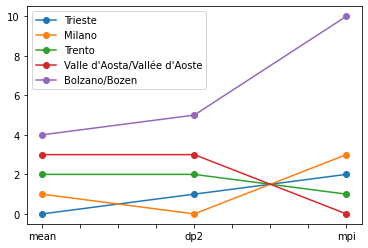

In [ ]:
pos.sort_values(by=['mean','dp2','mpi'])[0:5].T.plot(style='o-')

### RANKINGS DIFFERENCE

In [ ]:
#RMSE between 'MEAN' ranking and 'DP2' ranking
np.sqrt(mean_squared_error(pos.sort_values(by=['mean','dp2'])['mean'],pos.sort_values(by=['mean','dp2'])['dp2']))

4.741938560168322

In [ ]:
#RMSE between 'MEAN' ranking and 'MPI' ranking
np.sqrt(mean_squared_error(pos.sort_values(by=['mean','mpi'])['mean'],pos.sort_values(by=['mean','mpi'])['mpi']))

4.856828702633949

In [ ]:
#RMSE between 'MPI' ranking and 'DP2' ranking
np.sqrt(mean_squared_error(pos.sort_values(by=['mpi','dp2'])['mpi'],pos.sort_values(by=['mpi','dp2'])['dp2']))

6.371666253117899